In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def parse_dataset():
    clickbait = []
    non_clickbait = []
    with open("data/clickbait_data", 'rt') as data_in:
        for line in data_in:
            if line.strip():
                clickbait.append(line.strip())
                
                
    with open("data/non_clickbait_data", 'rt') as data_in:
        for line in data_in:
            if line.strip():
                non_clickbait.append(line.strip())

    return clickbait, non_clickbait

In [3]:
clickbait, non_clickbait = parse_dataset()

In [4]:
clickbait[:10]

['Should I Get Bings',
 'Which TV Female Friend Group Do You Belong In',
 'The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills',
 'This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect',
 'A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor',
 'How To Flirt With Queer Girls Without Making A Total Fool Of Yourself',
 '32 Cute Things To Distract From Your Awkward Thanksgiving',
 'If Disney Princesses Were From Florida',
 "What's A Quote Or Lyric That Best Describes Your Depression",
 'Natalie Dormer And Sam Claflin Play A Game To See How They\'d Actually Last In "The Hunger Games"']

In [5]:
non_clickbait[:10]

['Bill Changing Credit Card Rules Is Sent to Obama With Gun Measure Included',
 'In Hollywood, the Easy-Money Generation Toughens Up',
 "1700 runners still unaccounted for in UK's Lake District following flood",
 'Yankees Pitchers Trade Fielding Drills for Putting Practice',
 'Large earthquake rattles Indonesia; Seventh in two days',
 "Coldplay's new album hits stores worldwide this week",
 'U.N. Leader Presses Sri Lanka on Speeding Relief to War Refugees in Camps',
 '2 Somali-Americans Charged With Aiding Terror',
 "US Highway Administration releases interim report on Boston's Big Dig: press release claims tunnel safe, but report does not",
 'White House Announces International Meetings to Address Energy and Climate Issues']

In [6]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [7]:
def most_common_words(sentences, num=25):    
    words = ' '.join(sentences).lower().split()
    words_cleaned = [word for word in words if word not in stop]
    return pd.Series(words_cleaned).value_counts()[:num]

In [8]:
print('***** Clickbait *****')
print(most_common_words(clickbait))
print('***** Non-Clickbait *****')
print(most_common_words(non_clickbait))

***** Clickbait *****
things      994
people      909
know        800
make        760
17          670
21          642
based       607
19          578
actually    577
times       507
2015        494
like        485
best        465
new         429
here's      423
need        403
life        376
23          368
18          352
15          346
every       331
ever        321
get         315
zodiac      295
time        293
dtype: int64
***** Non-Clickbait *****
new           797
us            598
u.s.          523
dies          341
killed        333
dead          321
president     288
uk            282
kills         277
australian    270
says          269
wins          268
first         262
two           247
police        234
obama         232
court         223
british       222
world         217
iraq          213
china         208
former        194
found         193
crash         191
may           190
dtype: int64


In [12]:
titles = clickbait + non_clickbait

In [28]:
def word_count(sentences=titles):
    word_counts = list(map(lambda x: len(x.split()), sentences))
    return word_counts

def plot_counts(counts):
    print('Min Count:', np.min(counts))
    print('Mean Count:', np.mean(counts))
    print('Max Count:', np.max(counts))
    sns.distplot(counts)
    plt.show()

Min Count: 1
Mean Count: 9.06515625
Max Count: 26


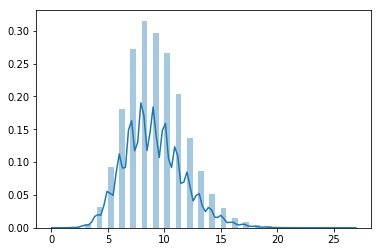

In [30]:
plot_counts(word_count())

In [35]:
words = []
for title in titles:
    words += title.lower().split()

np.unique([word for word in words if word not in stop]).shape

(30261,)